(sdp 781 :creation-time 12313 :reference-list())
(sdp 781-Chrome :creation-time 12313 :reference-list())
(sdp l-headgear :creation-time 1580985649 :reference-list (1580985649))
(sdp 781-time2 :creation-time 12313 :reference-list())

In [6]:
with open('img-dm.lisp', mode="r", encoding='utf8') as f:
    for i,j in enumerate(f):
        print(i,j)
print(i)
leng = str(i)

0 (add-dm-fct '((678t isa image-data text "678t" type image)

1 (679t isa image-data text "679t" type image)

2 (680t isa image-data text "680t" type image)

3 (682t isa image-data text "682t" type image)

4 (683t isa image-data text "683t" type image)

5 (684t isa image-data text "684t" type image)

6 (685t isa image-data text "685t" type image)

7 (687t isa image-data text "687t" type image)

8 (689t isa image-data text "689t" type image)

9 (691t isa image-data text "691t" type image)

10 (694t isa image-data text "694t" type image)

11 (695t isa image-data text "695t" type image)

12 (696t isa image-data text "696t" type image)

13 (697t isa image-data text "697t" type image)

14 (698t isa image-data text "698t" type image)

15 (699t isa image-data text "699t" type image)

16 (700t isa image-data text "700t" type image)

17 (701t isa image-data text "701t" type image)

18 (702t isa image-data text "702t" type image)

19 (703t isa image-data text "703t" type image)

20 (704t isa ima

591 (l-xefxbcx89 isa label-data text "xefxbcx89")

592 (705t-xefxbcx89 isa inc-label idata 705t label l-xefxbcx89)

593 (l-xe3x81xa7xe3x81x8dxe3x82x8b isa label-data text "xe3x81xa7xe3x81x8dxe3x82x8b")

594 (705t-xe3x81xa7xe3x81x8dxe3x82x8b isa inc-label idata 705t label l-xe3x81xa7xe3x81x8dxe3x82x8b)

595 (l-xe3x83x8dxe3x83x83xe3x83x88 isa label-data text "xe3x83x8dxe3x83x83xe3x83x88")

596 (705t-xe3x83x8dxe3x83x83xe3x83x88 isa inc-label idata 705t label l-xe3x83x8dxe3x83x83xe3x83x88)

597 (l-xe3x82xb9xe3x82xafxe3x83xaaxe3x83xbcxe3x83xb3 isa label-data text "xe3x82xb9xe3x82xafxe3x83xaaxe3x83xbcxe3x83xb3")

598 (706t-xe3x82xb9xe3x82xafxe3x83xaaxe3x83xbcxe3x83xb3 isa inc-label idata 706t label l-xe3x82xb9xe3x82xafxe3x83xaaxe3x83xbcxe3x83xb3)

599 (l-xe3x82xb7xe3x83xa7xe3x83x83xe3x83x88 isa label-data text "xe3x82xb7xe3x83xa7xe3x83x83xe3x83x88")

600 (706t-xe3x82xb7xe3x83xa7xe3x83x83xe3x83x88 isa inc-label idata 706t label l-xe3x82xb7xe3x83xa7xe3x83x83xe3x83x88)

601 (l-Javascript isa la

1023 (l-xe3x82x92 isa label-data text "xe3x82x92")

1024 (722t-xe3x82x92 isa inc-label idata 722t label l-xe3x82x92)

1025 (l-javascript isa label-data text "javascript")

1026 (722t-javascript isa inc-label idata 722t label l-javascript)

1027 (l-xe3x81xa8xe3x81x8b isa label-data text "xe3x81xa8xe3x81x8b")

1028 (722t-xe3x81xa8xe3x81x8b isa inc-label idata 722t label l-xe3x81xa8xe3x81x8b)

1029 (l-xe4xbdxbfxe3x81xa3 isa label-data text "xe4xbdxbfxe3x81xa3")

1030 (722t-xe4xbdxbfxe3x81xa3 isa inc-label idata 722t label l-xe4xbdxbfxe3x81xa3)

1031 (l-xe3x81xa6 isa label-data text "xe3x81xa6")

1032 (722t-xe3x81xa6 isa inc-label idata 722t label l-xe3x81xa6)

1033 (l-xe3x81xa8xe3x82x8b isa label-data text "xe3x81xa8xe3x82x8b")

1034 (722t-xe3x81xa8xe3x82x8b isa inc-label idata 722t label l-xe3x81xa8xe3x82x8b)

1035 (l-Javascript isa label-data text "Javascript")

1036 (723t-Javascript isa inc-label idata 723t label l-Javascript)

1037 (l-xe3x81xa7 isa label-data text "xe3x81xa7")

1038 (

1303 (l-huhih isa label-data text "huhih")

1304 (742t-huhih isa inc-label idata 742t label l-huhih)

1305 (l-- isa label-data text "-")

1306 (742t-- isa inc-label idata 742t label l--)

1307 (l-Google isa label-data text "Google")

1308 (742t-Google isa inc-label idata 742t label l-Google)

1309 (l-xe6xa4x9cxe7xb4xa2 isa label-data text "xe6xa4x9cxe7xb4xa2")

1310 (742t-xe6xa4x9cxe7xb4xa2 isa inc-label idata 742t label l-xe6xa4x9cxe7xb4xa2)

1311 (l-Chrome isa label-data text "Chrome")

1312 (743t-Chrome isa inc-label idata 743t label l-Chrome)

1313 (l-xe6x8bxa1xe5xbcxb5 isa label-data text "xe6x8bxa1xe5xbcxb5")

1314 (743t-xe6x8bxa1xe5xbcxb5 isa inc-label idata 743t label l-xe6x8bxa1xe5xbcxb5)

1315 (l-xe8x83x8cxe6x99xaf isa label-data text "xe8x83x8cxe6x99xaf")

1316 (743t-xe8x83x8cxe6x99xaf isa inc-label idata 743t label l-xe8x83x8cxe6x99xaf)

1317 (l-xe3x81xae isa label-data text "xe3x81xae")

1318 (743t-xe3x81xae isa inc-label idata 743t label l-xe3x81xae)

1319 (l-xe8x89xb2 is

1590 (755t-- isa inc-label idata 755t label l--)

1591 (l-GameWith isa label-data text "GameWith")

1592 (755t-GameWith isa inc-label idata 755t label l-GameWith)

1593 (l-xe3x80x90 isa label-data text "xe3x80x90")

1594 (756t-xe3x80x90 isa inc-label idata 756t label l-xe3x80x90)

1595 (l-xe3x81x82xe3x81xa4 isa label-data text "xe3x81x82xe3x81xa4")

1596 (756t-xe3x81x82xe3x81xa4 isa inc-label idata 756t label l-xe3x81x82xe3x81xa4)

1597 (l-xe6xa3xae isa label-data text "xe6xa3xae")

1598 (756t-xe6xa3xae isa inc-label idata 756t label l-xe6xa3xae)

1599 (l-xe3x80x91 isa label-data text "xe3x80x91")

1600 (756t-xe3x80x91 isa inc-label idata 756t label l-xe3x80x91)

1601 (l-xe3x82xabxe3x83x9fxe3x83x84xe3x82xadxe3x82xacxe3x83xa1 isa label-data text "xe3x82xabxe3x83x9fxe3x83x84xe3x82xadxe3x82xacxe3x83xa1")

1602 (756t-xe3x82xabxe3x83x9fxe3x83x84xe3x82xadxe3x82xacxe3x83xa1 isa inc-label idata 756t label l-xe3x82xabxe3x83x9fxe3x83x84xe3x82xadxe3x82xacxe3x83xa1)

1603 (l-xe3x81xae isa label-da

2090 (787t-xe5xadx97 isa inc-label idata 787t label l-xe5xadx97)

2091 (l-xe7x86x9fxe8xaax9e isa label-data text "xe7x86x9fxe8xaax9e")

2092 (787t-xe7x86x9fxe8xaax9e isa inc-label idata 787t label l-xe7x86x9fxe8xaax9e)

2093 (l-xe3x81xae isa label-data text "xe3x81xae")

2094 (787t-xe3x81xae isa inc-label idata 787t label l-xe3x81xae)

2095 (l-xe3x82xaaxe3x83xb3xe3x83xa9xe3x82xa4xe3x83xb3 isa label-data text "xe3x82xaaxe3x83xb3xe3x83xa9xe3x82xa4xe3x83xb3")

2096 (787t-xe3x82xaaxe3x83xb3xe3x83xa9xe3x82xa4xe3x83xb3 isa inc-label idata 787t label l-xe3x82xaaxe3x83xb3xe3x83xa9xe3x82xa4xe3x83xb3)

2097 (l-xe8xbex9exe6x9bxb8 isa label-data text "xe8xbex9exe6x9bxb8")

2098 (787t-xe8xbex9exe6x9bxb8 isa inc-label idata 787t label l-xe8xbex9exe6x9bxb8)

2099 (l-xe8x8bxb1xe5x92x8c isa label-data text "xe8x8bxb1xe5x92x8c")

2100 (788t-xe8x8bxb1xe5x92x8c isa inc-label idata 788t label l-xe8x8bxb1xe5x92x8c)

2101 (l-xe8xbex9exe5x85xb8 isa label-data text "xe8xbex9exe5x85xb8")

2102 (788t-xe8xbex9exe


2590 (844t-xe5xb1xa5xe6xadxb4 isa inc-label idata 844t label l-xe5xb1xa5xe6xadxb4)

2591 (l-xe3x82x92 isa label-data text "xe3x82x92")

2592 (844t-xe3x82x92 isa inc-label idata 844t label l-xe3x82x92)

2593 (l-CSV isa label-data text "CSV")

2594 (844t-CSV isa inc-label idata 844t label l-CSV)

2595 (l-xe5xbdxa2xe5xbcx8f isa label-data text "xe5xbdxa2xe5xbcx8f")

2596 (844t-xe5xbdxa2xe5xbcx8f isa inc-label idata 844t label l-xe5xbdxa2xe5xbcx8f)

2597 (l-xe3x81xa7 isa label-data text "xe3x81xa7")

2598 (844t-xe3x81xa7 isa inc-label idata 844t label l-xe3x81xa7)

2599 (l-xe4xbfx9dxe5xadx98 isa label-data text "xe4xbfx9dxe5xadx98")

2600 (844t-xe4xbfx9dxe5xadx98 isa inc-label idata 844t label l-xe4xbfx9dxe5xadx98)

2601 (l-xe3x81x99xe3x82x8b isa label-data text "xe3x81x99xe3x82x8b")

2602 (844t-xe3x81x99xe3x82x8b isa inc-label idata 844t label l-xe3x81x99xe3x82x8b)

2603 (l-xe6x96xb9xe6xb3x95 isa label-data text "xe6x96xb9xe6xb3x95")

2604 (844t-xe6x96xb9xe6xb3x95 isa inc-label idata 844

3089 (l-to isa label-data text "to")

3090 (872t-to isa inc-label idata 872t label l-to)

3091 (l-excel isa label-data text "excel")

3092 (872t-excel isa inc-label idata 872t label l-excel)

3093 (l-/ isa label-data text "/")

3094 (872t-/ isa inc-label idata 872t label l-/)

3095 (l-CSV isa label-data text "CSV")

3096 (872t-CSV isa inc-label idata 872t label l-CSV)

3097 (l-/ isa label-data text "/")

3098 (872t-/ isa inc-label idata 872t label l-/)

3099 (l-html isa label-data text "html")

3100 (872t-html isa inc-label idata 872t label l-html)

3101 (l-online isa label-data text "online")

3102 (872t-online isa inc-label idata 872t label l-online)

3103 (l-converter isa label-data text "converter")

3104 (872t-converter isa inc-label idata 872t label l-converter)

3105 (l-and isa label-data text "and")

3106 (872t-and isa inc-label idata 872t label l-and)

3107 (l-viewer isa label-data text "viewer")

3108 (872t-viewer isa inc-label idata 872t label l-viewer)

3109 (l-History isa 

In [7]:
import json

json_open = open('history.json', 'r', encoding='utf8')
json_load = json.load(json_open)

time = 10**15
for i in range(len(json_load)):
    time = min(json_load[i]['lastVisitTimeTimestamp'],time)
    if json_load[i]['id'] == '872':
        print(json_load[i])
time = int(time//1000)
print(time//1000)

{'typedCount': 0, 'id': '872', 'visitCount': 1, 'title': 'json-xls.com - json/xml to excel/CSV/html online converter and viewer', 'url': 'http://www.json-xls.com/', 'lastVisitTimeTimestamp': 1587381226297.221, 'lastVisitTime': '2020/4/20 20:13:46'}
1580883


In [8]:
#create image data
import glob
import os
files = glob.glob("./idata/*")

#(sdp 781 :creation-time 12313 :reference-list())

for file in files:
    with open(file ,mode="r", encoding='utf8') as f:
        with open("img-param.lisp",mode="a", encoding='utf8') as f2:
            s = ""
            tmp = 0
            for line in f.readlines():
                for text in line:
                    if text == '"':
                        tmp += 1
                        if tmp == 1:
                            continue
                    if tmp == 1:
                        s += text
                    elif tmp == 2:
                        break
                f2.write('(sdp '+s+' :creation-time '+str(time)+' :reference-count '+leng+')\n')
                break
        print(file)
        

./idata\678t.lisp
./idata\679t.lisp
./idata\680t.lisp
./idata\682t.lisp
./idata\683t.lisp
./idata\684t.lisp
./idata\685t.lisp
./idata\687t.lisp
./idata\689t.lisp
./idata\691t.lisp
./idata\694t.lisp
./idata\695t.lisp
./idata\696t.lisp
./idata\697t.lisp
./idata\698t.lisp
./idata\699t.lisp
./idata\700t.lisp
./idata\701t.lisp
./idata\702t.lisp
./idata\703t.lisp
./idata\704t.lisp
./idata\705t.lisp
./idata\706t.lisp
./idata\707t.lisp
./idata\708t.lisp
./idata\709t.lisp
./idata\710t.lisp
./idata\712t.lisp
./idata\713t.lisp
./idata\714t.lisp
./idata\715t.lisp
./idata\716t.lisp
./idata\717t.lisp
./idata\718t.lisp
./idata\719t.lisp
./idata\720t.lisp
./idata\721t.lisp
./idata\722t.lisp
./idata\723t.lisp
./idata\724t.lisp
./idata\725t.lisp
./idata\726t.lisp
./idata\727t.lisp
./idata\728t.lisp
./idata\729t.lisp
./idata\730t.lisp
./idata\731t.lisp
./idata\732t.lisp
./idata\733t.lisp
./idata\734t.lisp
./idata\735t.lisp
./idata\736t.lisp
./idata\737t.lisp
./idata\738t.lisp
./idata\739t.lisp
./idata\74

In [9]:
#create label data
import glob
import os
files = glob.glob("./idata/*")
#(sdp 781-Chrome :creation-time 12313 :reference-list())
#(sdp l-headgear :creation-time 1580985649 :reference-list (1580985649))
for file in files:
    with open(file ,mode="r", encoding='utf8') as f:
        with open("img-param.lisp",mode="a", encoding='utf8') as f2:
            ls = []
            for line in f.readlines():
                s = ""
                tmp = 0
                for i in range(len(line)):
                    if line[i] == '"':
                        tmp += 1
                        if tmp == 1:
                            continue
                    if tmp == 2:
                        break
                    elif tmp == 1:
                        s += str(line[i])
                if s == "":
                    break
                ls.append(s)
                if ls[0] == s:
                    continue
                f2.write('(sdp '+str(ls[0])+"-"+s+" :creation-time "+str(time)+' :reference-count '+leng+')\n')
                f2.write('(sdp '+"l-"+s+" :creation-time "+str(time)+' :reference-count '+leng+')\n')
        print(file)
        

./idata\678t.lisp
./idata\679t.lisp
./idata\680t.lisp
./idata\682t.lisp
./idata\683t.lisp
./idata\684t.lisp
./idata\685t.lisp
./idata\687t.lisp
./idata\689t.lisp
./idata\691t.lisp
./idata\694t.lisp
./idata\695t.lisp
./idata\696t.lisp
./idata\697t.lisp
./idata\698t.lisp
./idata\699t.lisp
./idata\700t.lisp
./idata\701t.lisp
./idata\702t.lisp
./idata\703t.lisp
./idata\704t.lisp
./idata\705t.lisp
./idata\706t.lisp
./idata\707t.lisp
./idata\708t.lisp
./idata\709t.lisp
./idata\710t.lisp
./idata\712t.lisp
./idata\713t.lisp
./idata\714t.lisp
./idata\715t.lisp
./idata\716t.lisp
./idata\717t.lisp
./idata\718t.lisp
./idata\719t.lisp
./idata\720t.lisp
./idata\721t.lisp
./idata\722t.lisp
./idata\723t.lisp
./idata\724t.lisp
./idata\725t.lisp
./idata\726t.lisp
./idata\727t.lisp
./idata\728t.lisp
./idata\729t.lisp
./idata\730t.lisp
./idata\731t.lisp
./idata\732t.lisp
./idata\733t.lisp
./idata\734t.lisp
./idata\735t.lisp
./idata\736t.lisp
./idata\737t.lisp
./idata\738t.lisp
./idata\739t.lisp
./idata\74

In [10]:
#create time data
import glob
import os
import json
files = glob.glob("./idata/*")
json_open = open('history.json', 'r', encoding='utf8')
json_load = json.load(json_open)
chunk_ls = []

def time_classify(time):
    t = time_month(time[5])
    create_time_chunk(t)
    return t
    
def time_month(month):
    return 'time'+str(month)

def create_time_chunk(chunk):
    global chunk_ls
    chunk_ls.append(chunk)

for file in files:
    with open(file ,mode="r", encoding='utf8') as f:
        with open("img-param.lisp",mode="a", encoding='utf8') as f2:
            s = ""
            tmp = 0
            for line in f.readlines():
                for text in line:
                    if text == '"':
                        tmp += 1
                        if tmp == 1:
                            continue
                    if tmp == 1:
                        s += text
                    elif tmp == 2:
                        break
                for i in range(len(json_load)):
                    if json_load[i]['id'] == s[:3]:
                        times = time_classify(json_load[i]['lastVisitTime'])
                        print(time)
                        f2.write('(sdp '+s+'-'+times+' :creation-time '+str(time)+' :reference-count '+leng+')\n')
                        break
                break
        print(file)
        
#(sdp 781-time2 :creation-time 12313 :reference-list())

1580883481
./idata\678t.lisp
1580883481
./idata\679t.lisp
1580883481
./idata\680t.lisp
1580883481
./idata\682t.lisp
1580883481
./idata\683t.lisp
1580883481
./idata\684t.lisp
1580883481
./idata\685t.lisp
1580883481
./idata\687t.lisp
1580883481
./idata\689t.lisp
1580883481
./idata\691t.lisp
1580883481
./idata\694t.lisp
1580883481
./idata\695t.lisp
1580883481
./idata\696t.lisp
1580883481
./idata\697t.lisp
1580883481
./idata\698t.lisp
1580883481
./idata\699t.lisp
1580883481
./idata\700t.lisp
1580883481
./idata\701t.lisp
1580883481
./idata\702t.lisp
1580883481
./idata\703t.lisp
1580883481
./idata\704t.lisp
1580883481
./idata\705t.lisp
1580883481
./idata\706t.lisp
1580883481
./idata\707t.lisp
1580883481
./idata\708t.lisp
1580883481
./idata\709t.lisp
1580883481
./idata\710t.lisp
1580883481
./idata\712t.lisp
1580883481
./idata\713t.lisp
1580883481
./idata\714t.lisp
1580883481
./idata\715t.lisp
1580883481
./idata\716t.lisp
1580883481
./idata\717t.lisp
1580883481
./idata\718t.lisp
1580883481
./i

In [64]:
with open('img-param.lisp',mode='r',encoding='utf8') as f:
    ls = []
    for i in f.readlines():
        ls.append(i)
print(len(ls))
ls = set(ls)
print(len(ls))
with open('img-param.lisp', mode='w', encoding='utf8') as f:
    for i in ls:
        f.write(i)

89
84


In [ ]:
chunk_

In [31]:
with open('img-param.lisp',mode='a',encoding='utf8') as f:
    chunk_ls = list(set(chunk_ls))
    for i in chunk_ls:
        f.write('(sdp '+i+' :creation-time '+str(time)+' :reference-count '+leng+')\n')


<BarContainer object of 3 artists>

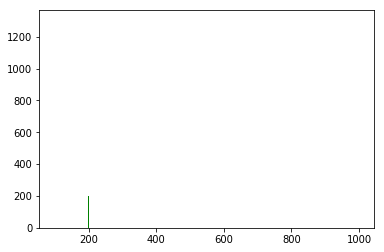

In [49]:
import numpy as np
left = np.array([100, 200, 400])
height = np.array([100, 200, 300])
height1 = np.array([100, 200, 300])
height2 = np.array([1000, 800, 600])
plt.bar(height1, left, color="green", width=0.3)
plt.bar(height2, left, bottom=height1, color="orange", width=0.3)
plt.bar(height2, left, bottom=height1+height2, color="blue", width=0.3)